**Сверточные нейронные сети**
Сверточные нейронные сети (CNN) возникли в результате изучения зрительной коры головного мозга и использовались для распознавания изображений с 1980-х годов. В последние годы благодаря возросшей вычислительной мощности, количеству доступных обучающих данных и приемам, уже описанным выше. Для обучения глубоких сетей CNN удалось достичь сверхчеловеческой производительности в некоторых сложных визуальных задачах. Этот тип сети можно найти в службах поиска изображений, автономных автомобилях, автоматических системах оценки видео и во многих других приложениях. Кроме того, CNN не ограничиваются визуальным восприятием, они также успешно справляются с такими задачами, как распознавание речи и обработка трехмерных данных.


**Зрительная кора**

Нейроны в зрительной коре имеют небольшое локальное рецептивное поле, что означает, что они реагируют только на зрительные стимулы, расположенные в ограниченной области поля зрения. Восприимчивые поля разных нейронов могут перекрываться и вместе образовывать полное поле зрения.

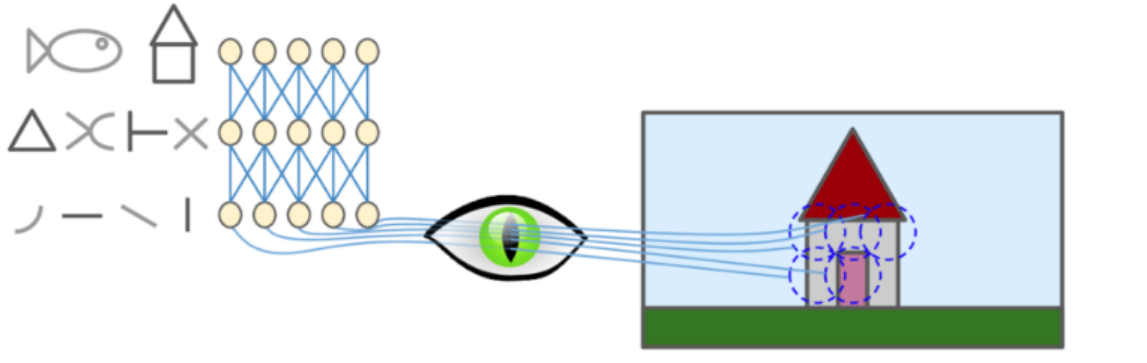

Нейроны в первых слоях зрительной коры реагируют только на определенные простые паттерны, такие как горизонтальные линии, в то время как другие реагируют на вертикальные линии (два нейрона могут иметь одинаковое рецептивное поле, но реагировать на разные ориентации линий). В последующих слоях нейроны имеют более крупные рецептивные поля и реагируют на более сложные паттерны, которые могут быть комбинациями паттернов более низкого уровня, тем самым выстраивая иерархию в разных слоях, что в конечном итоге приводит к формам и цветам, которые мы видим.

Основываясь на этих концепциях, Янн ЛеКанн представил CNN в 1998 году в известной архитектуре LeNet-5, используемой банками для автоматического распознавания рукописных чисел на чеках для более быстрой обработки.

**Сверточный слой**

 Сверточные сети состоят из нескольких слоев с разными обязанностями. Среди этих слоев наиболее важным является сверточный слой, который отвечает за идентификацию и построение различных форм, цветов и текстур аналогично зрительной коре головного мозга. Для выполнения этой задачи мы будем использовать набор фильтров (также называемых ядрами), которые мы будем перемещать по всему изображению, применяя операцию свертки. Эта операция заключается в применении скалярного произведения между фильтром и пикселями изображения, покрытыми фильтром, которое известно как воспринимающее поле. На следующем гифке вы можете увидеть эту операцию в действии, в которой у нас есть фильтр 3x3, который мы скользим по нашему изображению с разрешением 5x5. Для каждого возможного положения фильтра в изображении мы вычисляем произведение каждого пикселя на значение соответствующего фильтра и сохраняем результат в выходной карте.

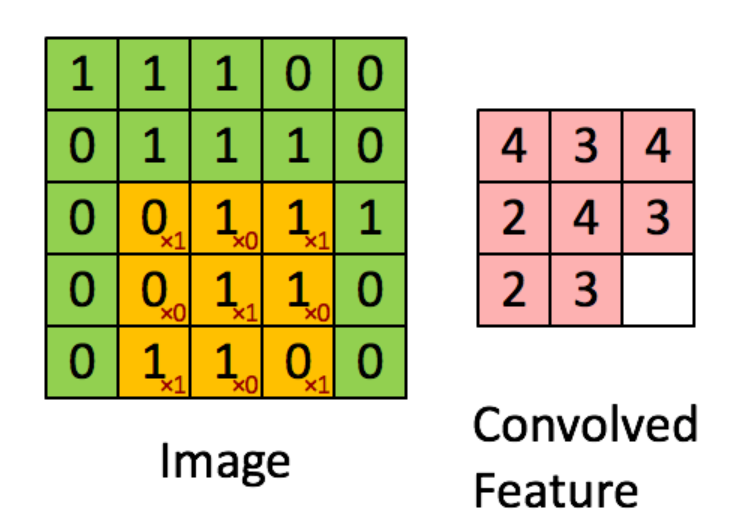

Во втором примере мы применяем ту же операцию, но теперь в том случае, если у нашего изображения 3 канала (изображение в цвете RGB). В этом случае наши фильтры также имеют 3 канала. Мы также применяем более одного фильтра, в результате чего количество каналов в выходной карте равно количеству используемых фильтров.

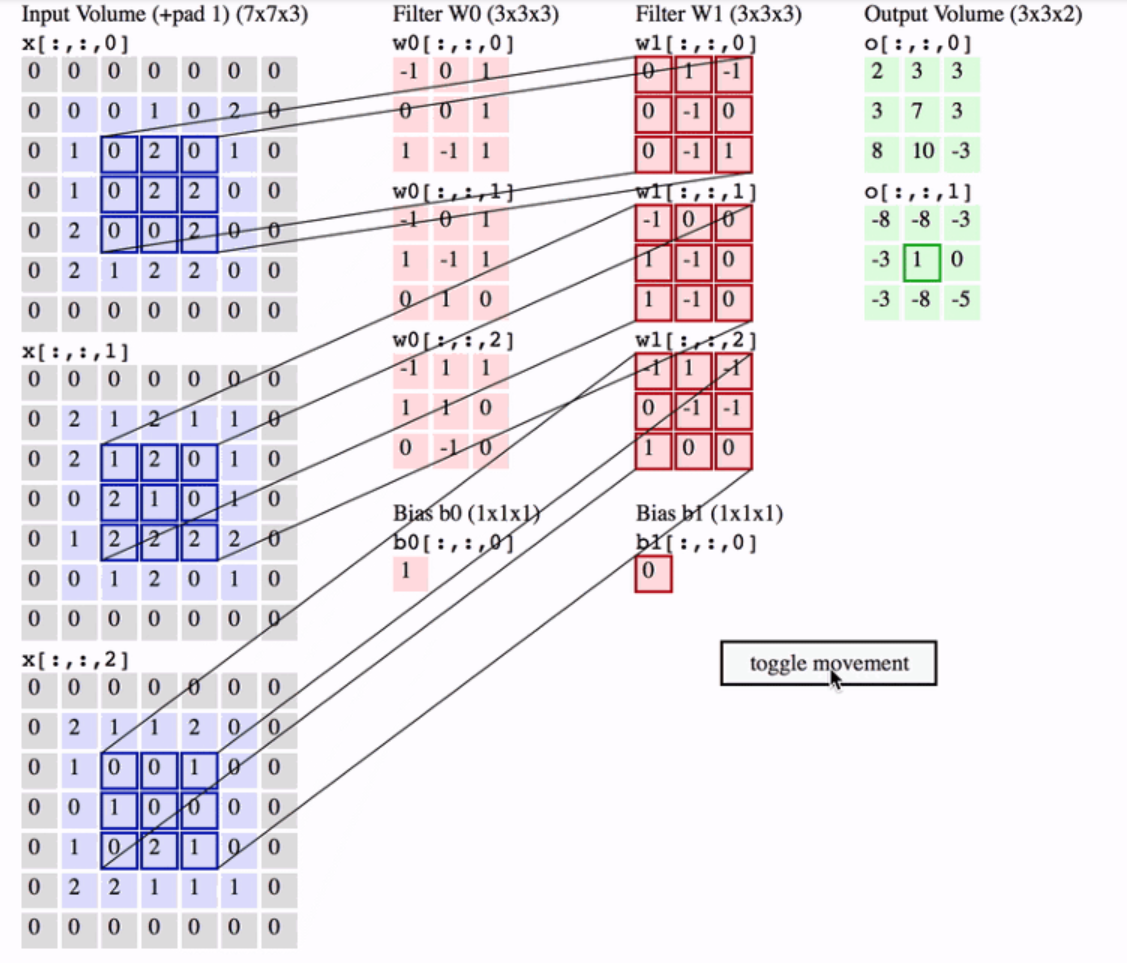

Пример приложения с реальными изображениями будет сделан ниже:

In [1]:
import torch
import torchvision

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%,          , 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
import numpy as np

train_imgs, train_labels = np.array([np.array(i[0]) for i in trainset]), np.array([i[1] for i in trainset])
test_imgs, test_labels = np.array([np.array(i[0]) for i in testset]), np.array([i[1] for i in testset])

train_imgs.shape, test_imgs.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

После того, как все изображения были преобразованы в массивы Numpy, мы собираемся визуализировать случайный пример.

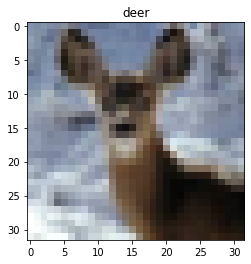

In [5]:
import random
import matplotlib.pyplot as plt

ix = random.randint(0, len(train_imgs))
img, label = train_imgs[ix], train_labels[ix]

plt.imshow(img)
plt.title(classes[label])
plt.show()

Теперь мы собираемся применить к этому изображению фильтр, определенный вручную. В этом случае мы применим фильтр 3x3 со значениями 1 в первой строке, 0 в средней строке и -1 в последней строке. Как видно из результата, этот фильтр полезен для определения горизонтальных линий.

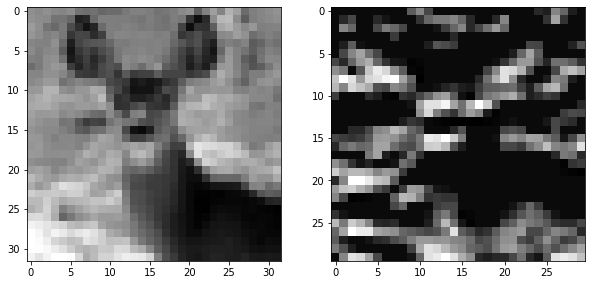

In [6]:
import numpy as np
import scipy.signal
from skimage import color
from skimage import exposure

img = color.rgb2gray(img)      

kernel = np.array([[1,1,1],
                   [0,0,0],
                   [-1,-1,-1]])

edges = scipy.signal.convolve2d(img, kernel, 'valid')
edges = exposure.equalize_adapthist(edges/np.max(np.abs(edges)), clip_limit=0.03)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(img, cmap=plt.cm.gray)   
ax2.imshow(edges, cmap=plt.cm.gray)   
plt.show()

Если теперь применить тот же фильтр, но с транспонированием, мы получим детектор вертикальных линий.

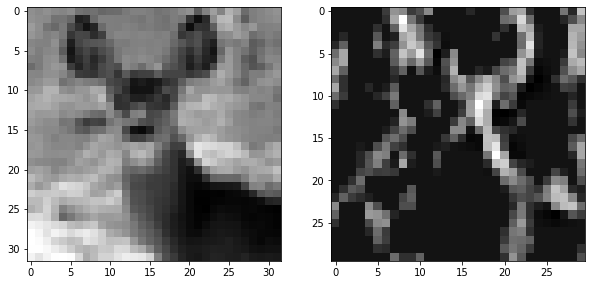

In [7]:
kernel = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

edges = scipy.signal.convolve2d(img, kernel, 'valid')
edges = exposure.equalize_adapthist(edges/np.max(np.abs(edges)), clip_limit=0.03)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(img, cmap=plt.cm.gray)   
ax2.imshow(edges, cmap=plt.cm.gray)   
plt.show()

Таким же образом следующий фильтр будет полезен для обнаружения краев в любой ориентации.


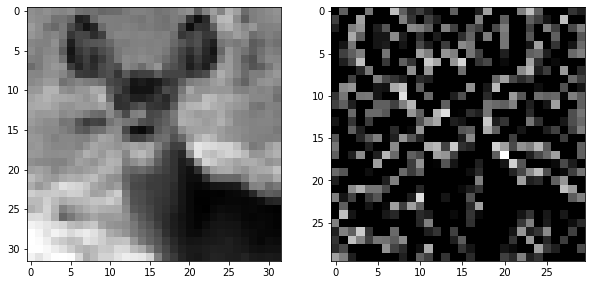

In [8]:
kernel = np.array([[0,-1,0],
                   [-1,4,-1],
                   [0,-1,0]])

edges = scipy.signal.convolve2d(img, kernel, 'valid')
edges = exposure.equalize_adapthist(edges/np.max(np.abs(edges)), clip_limit=0.03)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(img, cmap=plt.cm.gray)   
ax2.imshow(edges, cmap=plt.cm.gray)   
plt.show()

Как видите, применяя различные фильтры к нашему изображению, мы можем получить соответствующую информацию при выполнении таких задач, как классификация изображения, обнаружение в нем различных объектов или создание его текстового описания. Теперь вопрос: а как нам решить, какие фильтры использовать? Ответ прост: мы позволим нейронной сети самой изучить эти значения в процессе обучения, чтобы она сама решала, какие шаблоны являются наиболее важными при выполнении ее задачи. Итак, фильтры теперь будут параметрами нашей сети.